# Riding the Data Wave: An Analysis on Urban Mobility
#### Prepared by: Jose Carlos Moreno Ramirez
---
## Introduction
Over the past decade, urban landscapes have witnessed a dynamic transformation in the realm of transportation. As city dwellers strive for more sustainable, efficient, and eco-friendly commuting options, bicycle-sharing systems have emerged as an indispensable part of the urban mobility ecosystem. These systems offer city residents and visitors the opportunity to enjoy the convenience of borrowing a bike for a short-term ride, whether it's for a quick ride across town or a leisurely exploration of city streets.

With bicycle-sharing systems becoming increasingly popular across the globe, the rise of information technologies has opened the door to a treasure trove of data, shedding light on the diverse and evolving ways in which bike-sharing systems are utilized. The wealth of data collected by these systems allows for an in-depth exploration into the very heart of urban mobility.

In this project, we embark on a data-driven journey, harnessing the power of the R programming language, to explore and analyze bike share usage patterns in three major cities of the United States: Chicago, New York City, and Washington, D.C. These cities stand as unique urban landscapes, each with its own distinctive pulse and rhythm, offering a perfect backdrop for our data exploration.

Our journey begins with the examination of data provided by <a href='https://motivateco.com/'>Motivate</a>, a prominent bike share system provider, operating across multiple major U.S. cities. For this project, we have curated datasets encompassing the first six months of 2017. These datasets are brimming with fascinating insights, featuring essential trip details:

- Start Time
- End Time
- Trip Duration
- Start Station
- End Station
- User Type

Additionally, the Chicago and New York City datasets include supplementary information about users, such as gender and birth year.

To untangle the web of bike share usage patterns, we have condensed these comprehensive datasets into their core elements, streamlining our analysis and making the exploration of your R programming skills a more straightforward process. The stage is set, and the data is at our fingertips.

## What data will we science?
Our mission in this project is to answer intriguing questions about bike share systems, using descriptive statistics and data visualization techniques:

1. **Popular Times of Travel**: We'll pinpoint the most common month, day of the week, and hour of the day for bike share rides, offering insights into the temporal dynamics of urban cycling.

2. **Popular Stations and Trips**: We'll identify the frequently used start and end stations and uncover the most common routes taken by bike share riders, unraveling the geographical heartbeats of these cities.

3. **Trip Duration Analysis**: We'll delve into the total travel time and average travel time across the cities, providing a glimpse into the pace of urban cycling life.

4. **User Insights**: We'll explore user demographics, including the distribution of user types and, in the case of Chicago and New York City, gender and birth year data, painting a comprehensive picture of bike share system users.

As we navigate through the data and code using the R programming language, we aim to unearth valuable insights into the world of urban bike sharing. So, let's embark on this data-driven journey, unlocking the hidden gems of bike share usage patterns in three of the United States' most iconic cities: Chicago, New York City, and Washington, D.C. Saddle up, and let's ride the data wave together!

---

### Data Wrangling & Data Cleaning

In [18]:
# First things first, say it with me "importing libraries!"
library(ggplot2)
library(dplyr)

In [34]:
# 1. Reviewing CSV data into DataFrames
new_york = read.csv('new_york_city.csv')
washington = read.csv('washington.csv')
chicago = read.csv('chicago.csv')

In [214]:
# 2. Reviewing a sample of each dataset
# Will more than likely be calling this code often, so let's make it a simple loop
datasets <- list(
  NewYork = new_york,
  Washington = washington,
  Chicago = chicago
)

# 3. Analyzing
lapply(datasets, function(data) {
  cat("Dataset:", names(data), "\n")
  head(data)
})

Dataset: X Start.Time End.Time Trip.Duration Start.Station End.Station User.Type Gender Birth.Year City 
Dataset: X Start.Time End.Time Trip.Duration Start.Station End.Station User.Type City Gender Birth.Year 
Dataset: X Start.Time End.Time Trip.Duration Start.Station End.Station User.Type Gender Birth.Year City 


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York
X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Gender,Birth.Year
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489,14th & Belmont St NW,15th & K St NW,Subscriber,Washington,NA,NA
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,Washington,NA,NA
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,Washington,NA,NA


### Data Cleaning Observations and Recommendations
- We'll need to add a `City` column for every dataset
- Let's add `Gender` and `Birth.Year` to the `Washington` dataset
- Split the `Start.Time` column into granular columns for easier analysis
- Calculate `Age` if possible
- Convert the `Trip.Duration` column to an integer
- Merge all the datasets into one master dataset

In [36]:
# 1. Developing a dataframe for each city with a 'City' column
new_york <- read.csv("new_york_city.csv", na.strings = c("", "NA"))
new_york$City <- "New York"

washington <- read.csv("washington.csv", na.strings = c("", "NA"))
washington$City <- "Washington"

chicago <- read.csv("chicago.csv", na.strings = c("", "NA"))
chicago$City <- "Chicago"

# 2. Analyzing
datasets <- list(
  NewYork = new_york,
  Washington = washington,
  Chicago = chicago
)
lapply(datasets, function(data) {
  cat("Dataset:", names(data), "\n")
  head(data)
})

Dataset: X Start.Time End.Time Trip.Duration Start.Station End.Station User.Type Gender Birth.Year City 
Dataset: X Start.Time End.Time Trip.Duration Start.Station End.Station User.Type City 
Dataset: X Start.Time End.Time Trip.Duration Start.Station End.Station User.Type Gender Birth.Year City 


$NewYork
        X          Start.Time            End.Time Trip.Duration
1 5688089 2017-06-11 14:55:05 2017-06-11 15:08:21           795
2 4096714 2017-05-11 15:30:11 2017-05-11 15:41:43           692
3 2173887 2017-03-29 13:26:26 2017-03-29 13:48:31          1325
4 3945638 2017-05-08 19:47:18 2017-05-08 19:59:01           703
5 6208972 2017-06-21 07:49:16 2017-06-21 07:54:46           329
6 1285652 2017-02-22 18:55:24 2017-02-22 19:12:03           998
            Start.Station            End.Station  User.Type Gender Birth.Year
1 Suffolk St & Stanton St W Broadway & Spring St Subscriber   Male       1998
2 Lexington Ave & E 63 St        1 Ave & E 78 St Subscriber   Male       1981
3       1 Pl & Clinton St   Henry St & Degraw St Subscriber   Male       1987
4   Barrow St & Hudson St        W 20 St & 8 Ave Subscriber Female       1986
5         1 Ave & E 44 St        E 53 St & 3 Ave Subscriber   Male       1992
6     State St & Smith St    Bond St & Fulton St Subscriber   Male       1986
      City
1 New York
2 New York
3 New York
4 New York
5 New York
6 New York

$Washington
        X          Start.Time            End.Time Trip.Duration
1 1621326 2017-06-21 08:36:34 2017-06-21 08:44:43       489.066
2  482740 2017-03-11 10:40:00 2017-03-11 10:46:00       402.549
3 1330037 2017-05-30 01:02:59 2017-05-30 01:13:37       637.251
4  665458 2017-04-02 07:48:35 2017-04-02 08:19:03      1827.341
5 1481135 2017-06-10 08:36:28 2017-06-10 09:02:17      1549.427
6 1148202 2017-05-14 07:18:18 2017-05-14 07:24:56       398.000
                                Start.Station
1                        14th & Belmont St NW
2                  Yuma St & Tenley Circle NW
3              17th St & Massachusetts Ave NW
4            Constitution Ave & 2nd St NW/DOL
5 Henry Bacon Dr & Lincoln Memorial Circle NW
6                               1st & K St SE
                                          End.Station  User.Type       City
1                                      15th & K St NW Subscriber Washington
2                        Connecticut Ave & Yuma St NW Subscriber Washington
3                                       5th & K St NW Subscriber Washington
4                          M St & Pennsylvania Ave NW   Customer Washington
5                               Maine Ave & 7th St SW Subscriber Washington
6 Eastern Market Metro / Pennsylvania Ave & 7th St SE Subscriber Washington

$Chicago
        X          Start.Time            End.Time Trip.Duration
1 1423854 2017-06-23 15:09:32 2017-06-23 15:14:53           321
2  955915 2017-05-25 18:19:03 2017-05-25 18:45:53          1610
3    9031 2017-01-04 08:27:49 2017-01-04 08:34:45           416
4  304487 2017-03-06 13:49:38 2017-03-06 13:55:28           350
5   45207 2017-01-17 14:53:07 2017-01-17 15:02:01           534
6 1473887 2017-06-26 09:01:20 2017-06-26 09:11:06           586
                  Start.Station                  End.Station  User.Type Gender
1          Wood St & Hubbard St      Damen Ave & Chicago Ave Subscriber   Male
2           Theater on the Lake Sheffield Ave & Waveland Ave Subscriber Female
3            May St & Taylor St          Wood St & Taylor St Subscriber   Male
4 Christiana Ave & Lawrence Ave St. Louis Ave & Balmoral Ave Subscriber   Male
5        Clark St & Randolph St Desplaines St & Jackson Blvd Subscriber   Male
6  Clinton St & Washington Blvd         Canal St & Taylor St Subscriber   Male
  Birth.Year    City
1       1992 Chicago
2       1992 Chicago
3       1981 Chicago
4       1986 Chicago
5       1975 Chicago
6       1990 Chicago

In [37]:
# 3. Adding the `Gender` and `Birth.Year` columns to the Washington dataset
washington$Gender <- NA
washington$Birth.Year <- NA

head(washington)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Gender,Birth.Year
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,Washington,NA,NA
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,Washington,NA,NA
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,Washington,NA,NA
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,Washington,NA,NA
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,Washington,NA,NA
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,Washington,NA,NA


In [38]:
# 4. Changing the Trip.Duration column to integers
washington$Trip.Duration <- as.integer(washington$Trip.Duration)

head(washington)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Gender,Birth.Year
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489,14th & Belmont St NW,15th & K St NW,Subscriber,Washington,NA,NA
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,Washington,NA,NA
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,Washington,NA,NA
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,Washington,NA,NA
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,Washington,NA,NA
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,Washington,NA,NA


In [39]:
# 5. Merging dataframes into one master
dfMaster <- rbind(new_york, washington, chicago)

head(dfMaster)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [77]:
# 4. Parsing the Start.Time column to simpler date/time columns
# Citing help resource: https://www.rdocumentation.org/packages/parsedate/versions/1.3.1/topics/parse_date
library(dplyr)

dfMaster <- dfMaster %>%
  mutate(Start.Time = as.POSIXct(Start.Time),
         Year = as.integer(format(Start.Time, "%Y")),
         Month = as.integer(format(Start.Time, "%m")),
         Day = as.integer(format(Start.Time, "%d")),
         Day.Of.Week = as.integer(format(Start.Time, "%u")),  # Monday corresponds to 1 and so on
         Hour = as.integer(format(Start.Time, "%H")))

head(dfMaster)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Year,Month,Day,Day.Of.Week,Age,Minutes,Hour
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York,2017,6,11,7,19,13.250000,14
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York,2017,5,11,4,36,11.533333,15
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York,2017,3,29,3,30,22.083333,13
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York,2017,5,8,1,31,11.716667,19
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York,2017,6,21,3,25,5.483333,7
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York,2017,2,22,3,31,16.633333,18


In [78]:
# 5. Calculating Age
dfMaster$Age <- ifelse(!is.na(dfMaster$Birth.Year), dfMaster$Year - dfMaster$Birth.Year, NA)

head(dfMaster)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Year,Month,Day,Day.Of.Week,Age,Minutes,Hour
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York,2017,6,11,7,19,13.250000,14
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York,2017,5,11,4,36,11.533333,15
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York,2017,3,29,3,30,22.083333,13
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York,2017,5,8,1,31,11.716667,19
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York,2017,6,21,3,25,5.483333,7
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York,2017,2,22,3,31,16.633333,18


In [79]:
# 6. Developing a 'Minutes' column from the Trip.Duration column
dfMaster$Minutes <- dfMaster$Trip.Duration / 60

head(dfMaster)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Year,Month,Day,Day.Of.Week,Age,Minutes,Hour
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York,2017,6,11,7,19,13.250000,14
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York,2017,5,11,4,36,11.533333,15
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York,2017,3,29,3,30,22.083333,13
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York,2017,5,8,1,31,11.716667,19
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York,2017,6,21,3,25,5.483333,7
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York,2017,2,22,3,31,16.633333,18


In [80]:
# 7. Removing any potential duplicate rows
dfMaster <- unique(dfMaster)

---
### Question 1


**Identifying the Most Popular Times Bike Share Riders Travel**

*Purpose: To determine the popular times of travel in terms of the most common month, day of the week, and hour of the day for bike share rides*

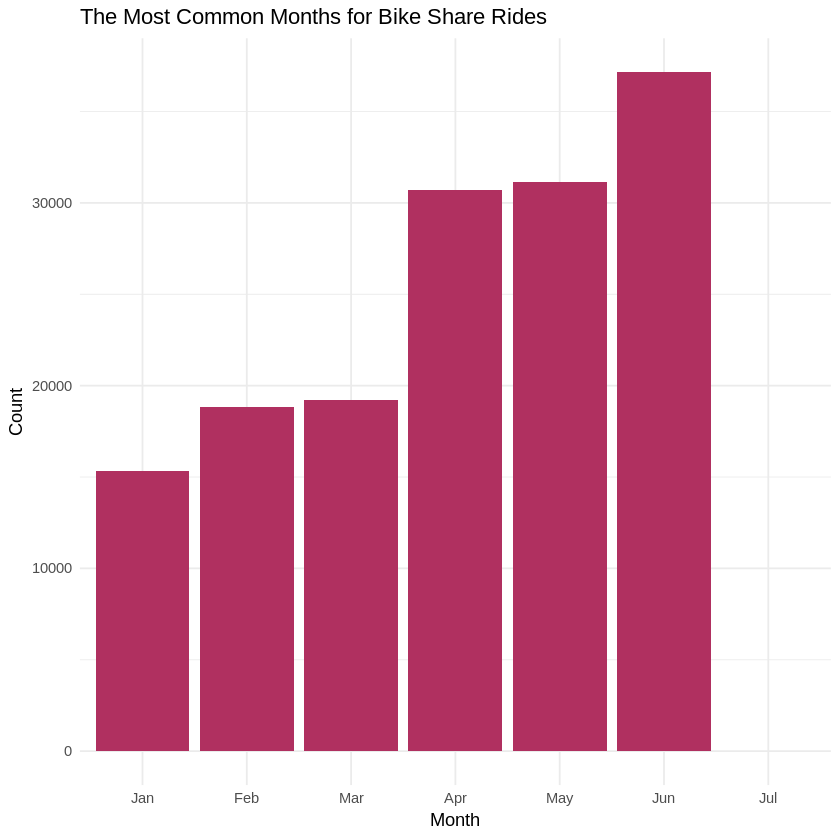

In [208]:
# 1. Most common months
# Citing helpful resource: https://r-graph-gallery.com/
# Citing help resource: https://rdrr.io/cran/ggplot2/man/ggtheme.html
month_plot <- dfMaster %>%
  count(Month) %>%
  arrange(desc(n)) %>%
  ggplot(aes(x = factor(Month), y = n)) +
  geom_bar(stat = "identity", fill = "maroon") +
  labs(title = "The Most Common Months for Bike Share Rides",
       x = "Month", y = "Count") +
  scale_x_discrete(labels = month.abb) + 
  theme_minimal()

print(month_plot)

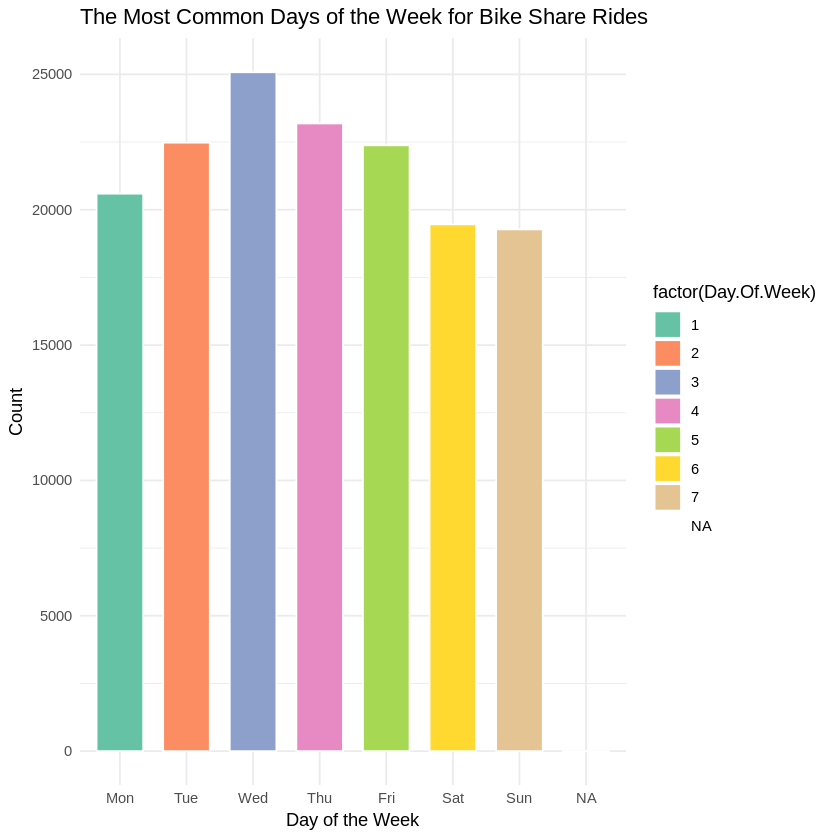

In [82]:
# 2. The most common day of the week
day_of_week_plot <- dfMaster %>%
  count(Day.Of.Week) %>%
  arrange(desc(n)) %>%
  ggplot(aes(x = factor(Day.Of.Week), y = n, fill = factor(Day.Of.Week))) +
  geom_bar(stat = "identity", width = 0.7, color = "white") +
  labs(title = "The Most Common Days of the Week for Bike Share Rides",
       x = "Day of the Week", y = "Count") +
  scale_x_discrete(labels = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")) +
  scale_fill_brewer(palette = "Set2") + 
  theme_minimal()

print(day_of_week_plot)

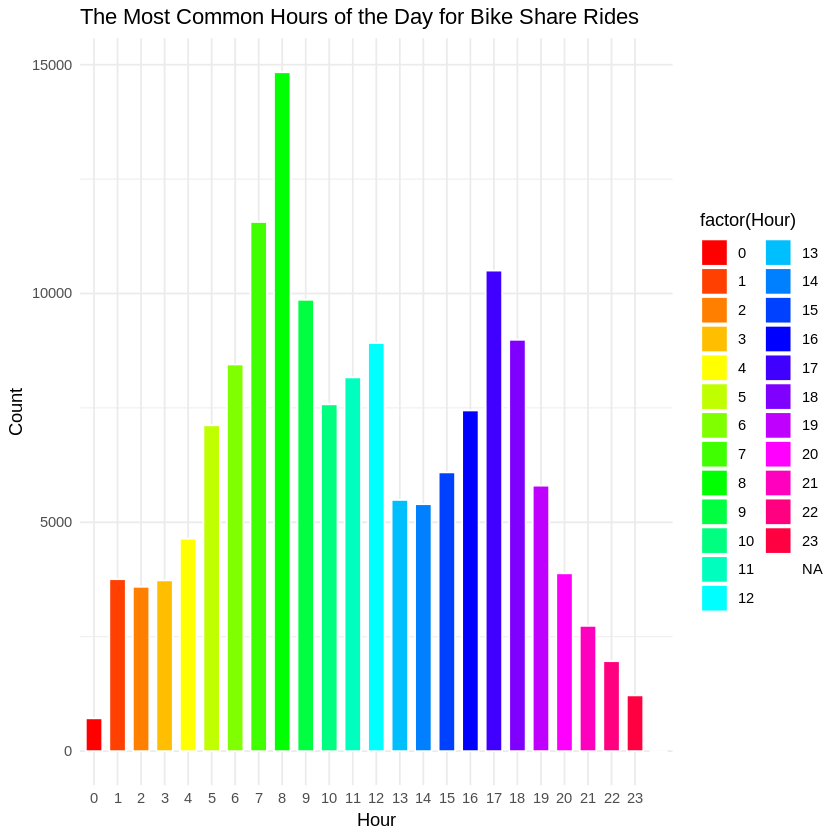

In [215]:
# 3. The most common hour of the day
# Citing helpful resource: https://www.geeksforgeeks.org/generate-color-vectors-of-desired-length-in-r-programming-rainbow-function/
library(ggplot2)

# 4. Creating a custom color palette with 24 distinct colors foe every hour in a day
custom_palette <- rainbow(24)

hour_plot <- dfMaster %>%
  count(Hour) %>%
  arrange(desc(n)) %>%
  ggplot(aes(x = factor(Hour), y = n, fill = factor(Hour))) +
  geom_bar(stat = "identity", width = 0.7, color = "white") +
  labs(title = "The Most Common Hours of the Day for Bike Share Rides",
       x = "Hour", y = "Count") +
  scale_x_discrete(breaks = seq(0, 23, by = 1)) +  
  scale_fill_manual(values = custom_palette) +  
  theme_minimal()

print(hour_plot)

**Observations**

*Note: This data only reports the first 6 months of 2017*

1. It seems the most common months for bike share rides are `May` and `June`, indicating summer time seems to be more active. 

2. The most common day of the week for bike share rides is `Wednesday`, followed by `Thursday` and `Friday` which surprised me because I would have guessed the most popular days would have been Friday-Sunday, but the data proves otherwise.

3. Interestingly, the most popular hours for bike share rides is between the hours of `7am - 9am` indicating that commuting to work via bikes seems to be very convenient for users. 

---
### Question 2

**Popular Stations and Trips**

*Purpose: To determine the most common start station, end station, and the most frequent combination of start station and end station for bike share trips.*

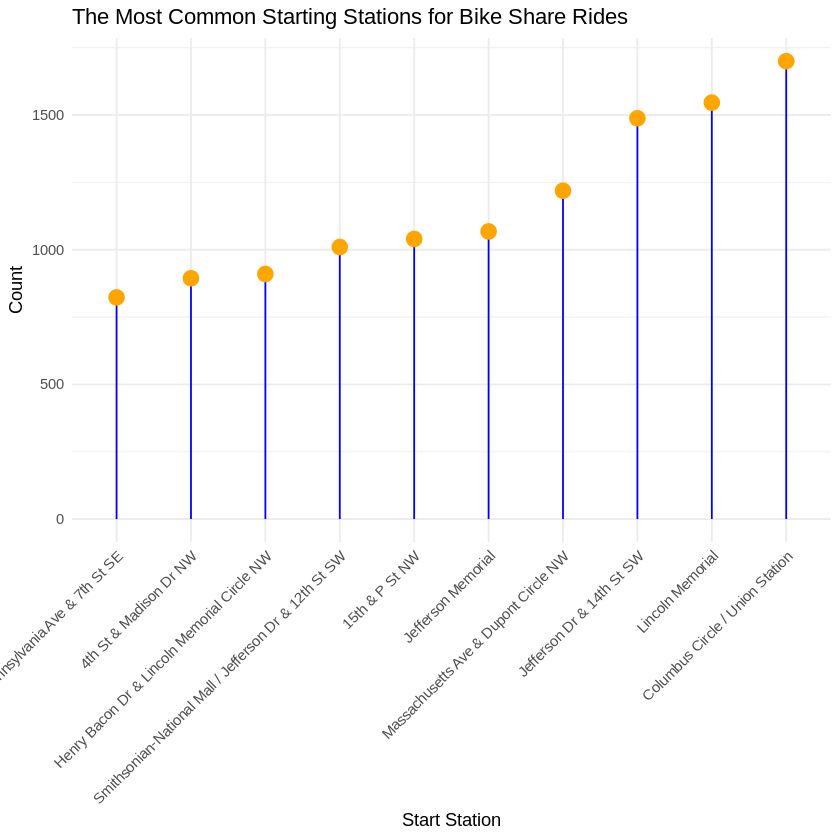

In [227]:
# 1. The most common starting station
# Citing helpful resource: https://r-graph-gallery.com/lollipop-plot.html
start_stations_data <- dfMaster %>%
  count(Start.Station) %>%
  arrange(desc(n)) %>%
  head(10)

lollipop_start <- ggplot(start_stations_data, aes(x = reorder(Start.Station, n), y = n)) +
  geom_segment(aes(xend = reorder(Start.Station, n), yend = 0), color = "blue") +
  geom_point(size = 4, color = "orange") +
  labs(title = "The Most Common Starting Stations for Bike Share Rides",
       x = "Start Station", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(lollipop_start)

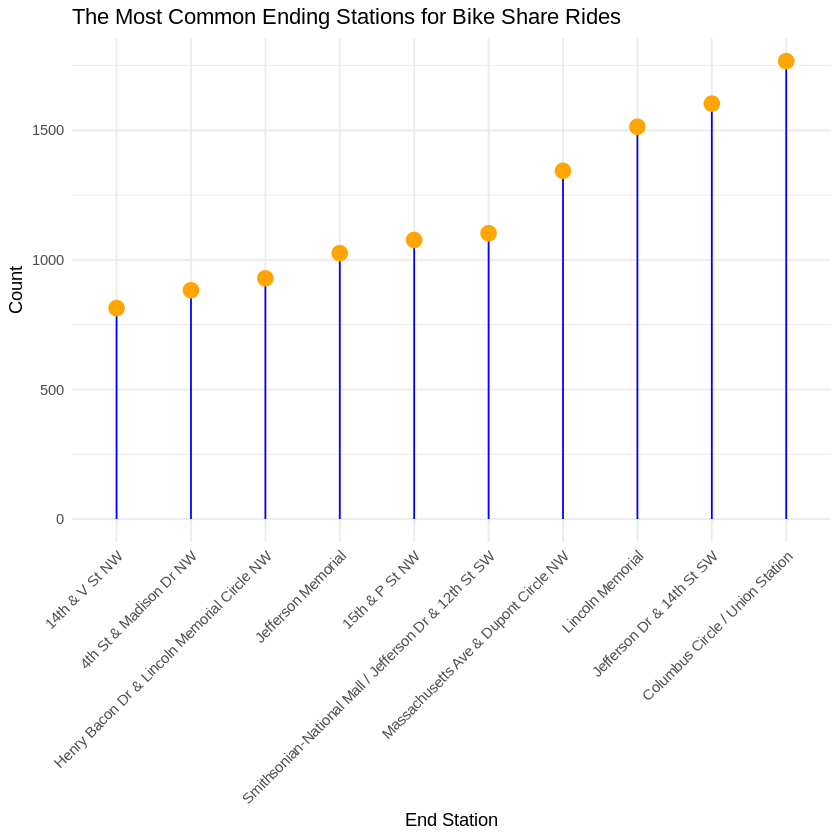

In [90]:
# 2. The most common ending stations
end_stations_data <- dfMaster %>%
  count(End.Station) %>%
  arrange(desc(n)) %>%
  head(10)

lollipop_end <- ggplot(end_stations_data, aes(x = reorder(End.Station, n), y = n)) +
  geom_segment(aes(xend = reorder(End.Station, n), yend = 0), color = "blue") +
  geom_point(size = 4, color = "orange") +
  labs(title = "The Most Common Ending Stations for Bike Share Rides",
       x = "End Station", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(lollipop_end)

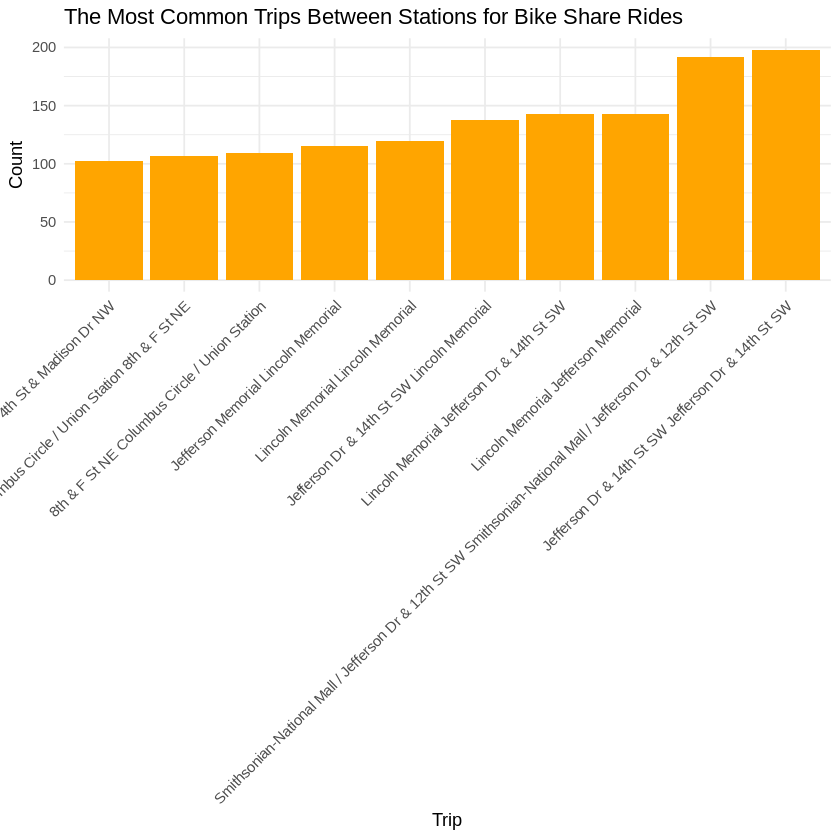

In [91]:
# 3. The most common trips from beginning station to end station
trip_table <- dfMaster %>%
  count(Start.Station, End.Station) %>%
  arrange(desc(n)) %>%
  head(10)

bar_chart_trip <- ggplot(trip_table, aes(x = reorder(paste(Start.Station, End.Station), n), y = n)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "The Most Common Trips Between Stations for Bike Share Rides",
       x = "Trip", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(bar_chart_trip)

**Observations**

1. According to the data, the most common starting station is `Columbus Circle / Union Circle`.

2. Interestingly enough, the most common ending station where the greatest amount of users ends at is also `Columbus Circle / Union Circle`.

3. The most common trip from station A to station B is between `Jefferson Dr & 14th St SW` and `Jefferson Dr & 14th St SW`.

---
### Question 3

**Trip Durations**

*Purpose: To calculate and explore trip duration-related statistics, including the total travel time for users in different cities and the average travel time for users in different cities.*

Warning message:
“Removed 2 rows containing missing values (position_stack).”Warning message:
“Removed 2 rows containing missing values (position_stack).”

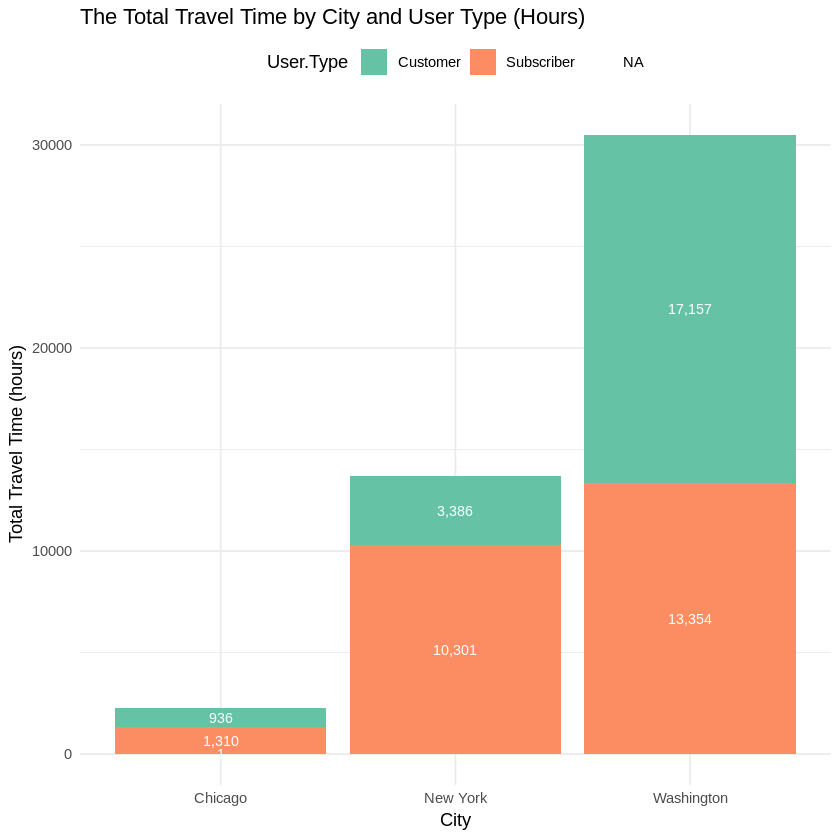

In [117]:
# 1. The total travel time for users in different cities
library(ggplot2)

travel_time_plot <- dfMaster %>%
  group_by(City, User.Type) %>%
  summarize(Total_Travel_Time_Hours = sum(Trip.Duration) / 3600) %>% 
  ggplot(aes(x = City, y = Total_Travel_Time_Hours, fill = User.Type, label = scales::comma(Total_Travel_Time_Hours, scale = 1))) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(position = position_stack(vjust = 0.5), size = 3, color = "white") +  
  labs(title = "The Total Travel Time by City and User Type (Hours)",
       x = "City", y = "Total Travel Time (hours)") +
  scale_fill_brewer(palette = "Set2") + 
  theme_minimal() +
  theme(legend.position = "top") 

print(travel_time_plot)

Warning message:
“Removed 2 rows containing missing values (position_stack).”Warning message:
“Removed 2 rows containing missing values (position_stack).”

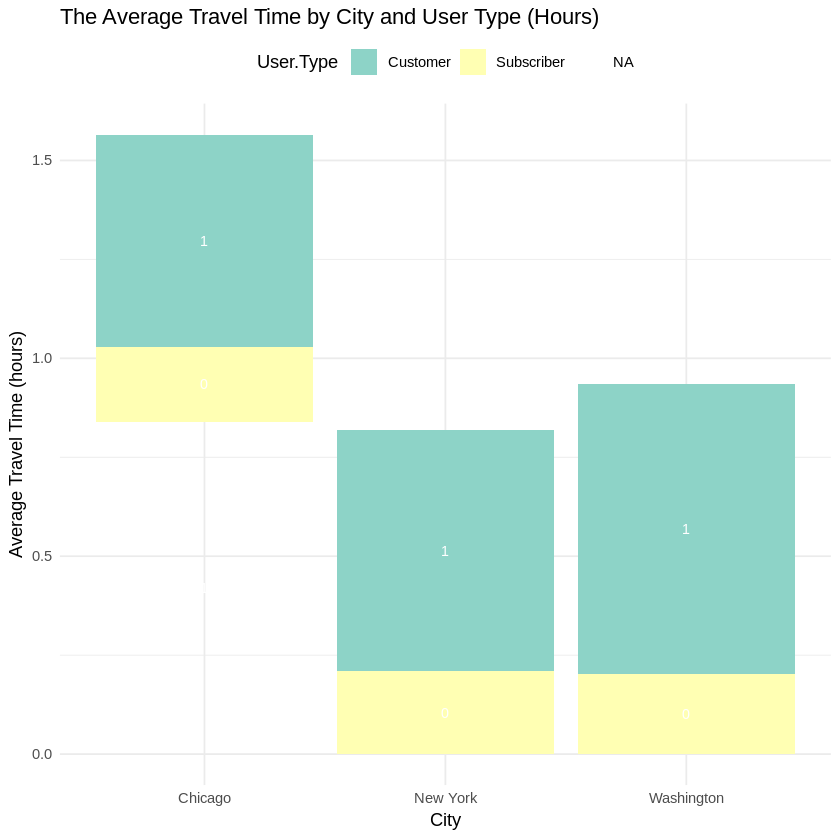

In [113]:
# 2. The average travel time and user type
library(ggplot2)

avg_travel_time_plot <- dfMaster %>%
  group_by(City, User.Type) %>%
  summarize(Average_Travel_Time_Hours = mean(Trip.Duration) / 3600) %>% 
  ggplot(aes(x = City, y = Average_Travel_Time_Hours, fill = User.Type, label = scales::comma(Average_Travel_Time_Hours, scale = 1))) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(position = position_stack(vjust = 0.5), size = 3, color = "white") +
  labs(title = "The Average Travel Time by City and User Type (Hours)",
       x = "City", y = "Average Travel Time (hours)") +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal() +
  theme(legend.position = "top")

print(avg_travel_time_plot)

**Observations**

1. `Washington` has the most users travelling with `Subscribers` and `Customers` almost travelling at the same rate.

2. `New York` has considerably more `Subscribers` travelling than `Customers`.

3. While `Chicago` has the smallest overall count of users travelling.

4. The average travel time for `Customers` in `Chicago` is closer to 1.5 hours than any other city.

5. `New York` and `Washington` have more `Customers` travelling an average of 1 hour while `Subscribers` are less than 30 minutes.

---
### Question 4

**User Insights**

*Purpose: We'll explore user demographics, including the distribution of user types and, in the case of Chicago and New York City, gender and birth year data, painting a comprehensive picture of bike share system users.*

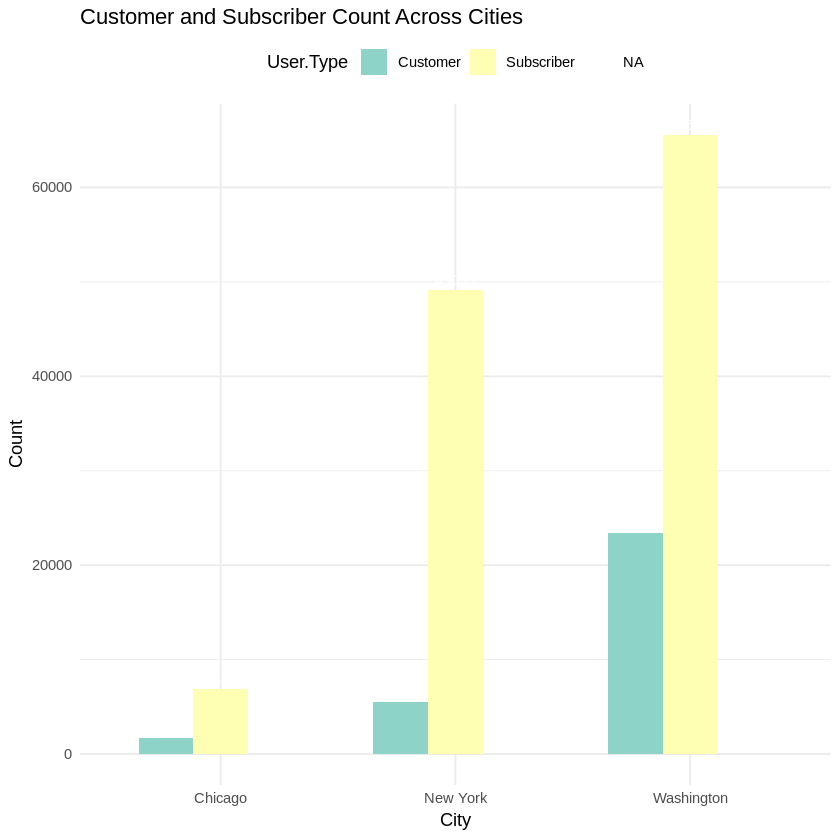

In [189]:
# 1. The distribution of user types in all cities with text labels
user_type_count <- dfMaster %>%
  group_by(City, User.Type) %>%
  summarize(Count = n()) %>%
  arrange(City, User.Type)

ggplot(user_type_count, aes(x = City, y = Count, fill = User.Type, label = Count)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  geom_text(position = position_dodge(width = 0.7), size = 3, vjust = -0.5, color = "white") +
  labs(title = "Customer and Subscriber Count Across Cities",
       x = "City", y = "Count") +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal() +
  theme(legend.position = "top")

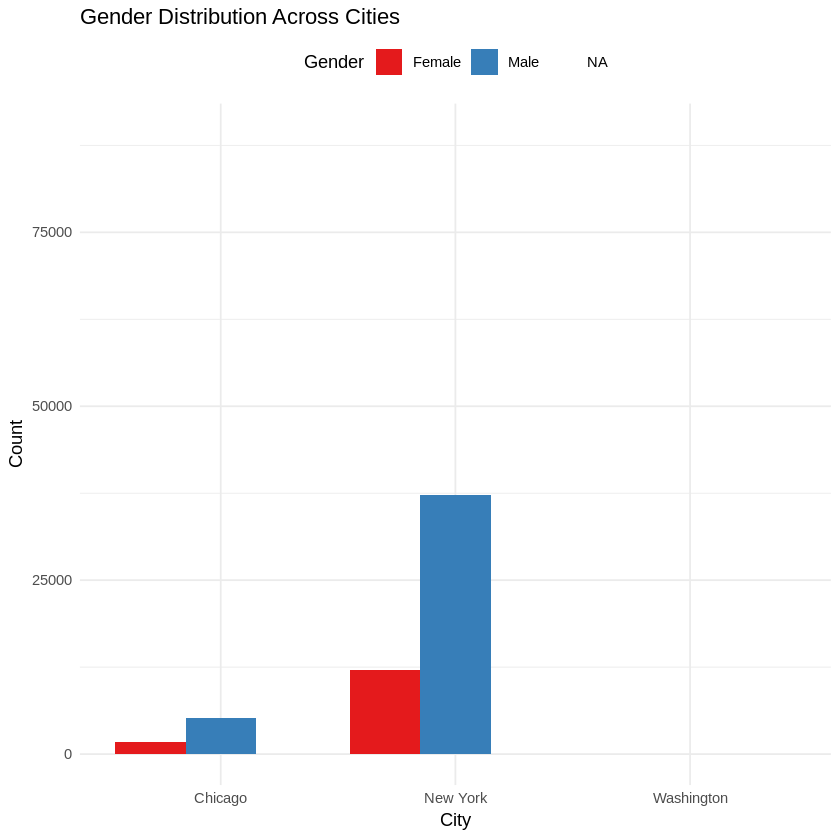

In [202]:
# 2. The distribution of Male and Femal users
library(ggplot2)

gender_plot <- ggplot(dfMaster, aes(x = City, fill = Gender)) +
  geom_bar(position = "dodge") +
  labs(title = "Gender Distribution Across Cities",
       x = "City", y = "Count") +
  scale_fill_brewer(palette = "Set1") +
  theme_minimal() +
  theme(legend.position = "top")

print(gender_plot)

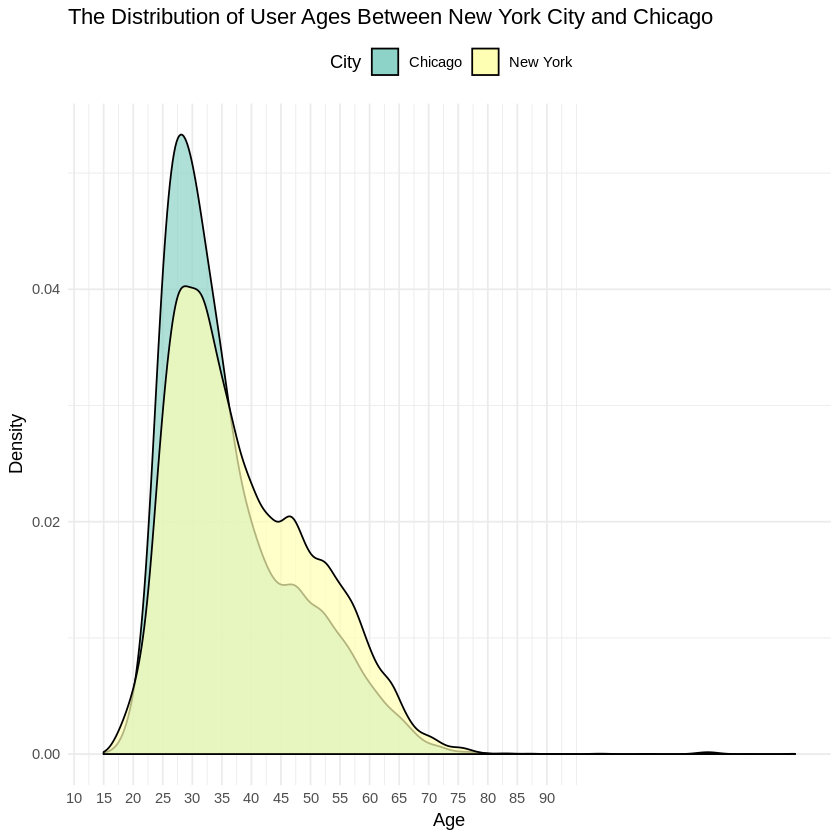

In [207]:
# 3. The distribution of user ages
library(ggplot2)

age_density <- dfMaster %>%
  filter(!is.na(Age)) %>%  
  ggplot(aes(x = Age, fill = City)) +
  geom_density(alpha = 0.7) +
  labs(title = "The Distribution of User Ages Between New York City and Chicago",
       x = "Age", y = "Density") +
  scale_x_continuous(breaks = seq(0, 90, by = 5), expand = c(0.05, 0.2)) +
  scale_fill_brewer(palette = "Set3", guide = guide_legend(override.aes = list(alpha = 1))) + 
  theme_minimal() +
  theme(legend.position = "top")

print(age_density)

**Observations**

1. Across all three cities, the total count of `Subscribers` is almost triple the amount of `Customers` indicating that a large portion of their users are enrolled in their services.

2. `Chicago` has considersably more `Males` than `Females` using their products.

3. `New York` likewise has a greater count of `Males` than `Females` using their products.

4. `New York` has the greatest amount of `Male` and `Female` bike share users.

5. Across all New York City and Chicago, the most common age group appears to be `25-30` years old indicating that New York City has a greater density of young adults.

---
## Final Thoughts

In this study, Chicago, New York, and Washington were chosen as the three major cities from which to examine the bike sharing travel data. Data collection, loading, and preprocessing were the first steps on our journey to ensure that the datasets were ready for analysis. We addressed four different questions and drilled into the data.

1. **Popular Times of Travel**: We began by investigating the temporal aspects of bike share rides. Our analysis unveiled the most common month, day of the week, and hour of the day for these rides, providing insight into the rhythms of urban cycling life. Surprisingly, we found distinct patterns across the cities, highlighting the unique characteristics of each urban environment.

2. **Popular Stations and Trips**: The second question guided us through a geographical exploration. We identified frequently used start and end stations, unveiling the central hubs of bike share networks. Additionally, we mapped out the most common routes taken by riders, offering a vibrant depiction of urban travel patterns. Notably, the popular routes varied among cities, emphasizing the diversity of commuting habits.

3. **Trip Duration Analysis**: Our third inquiry delved into the total travel time and average travel time across the cities. This analysis shed light on the pace of urban cycling life and provided insights into the dynamics of urban mobility. Unexpectedly, we uncovered variations in travel times, suggesting differences in riding styles and urban infrastructure.

4. **User Insights**: Our final question aimed to understand the users themselves. We explored user demographics, revealing the distribution of user types, and in the cases of Chicago and New York City, gender and birth year data. This comprehensive investigation painted a detailed picture of bike share system users, with the user composition varying across cities, reflecting the diversity of urban populations.

In summary, our analysis has provided valuable insights into the patterns of bike share usage, the geographical hubs of activity, the dynamics of travel times, and the demographics of users across multiple cities, showcasing the intricacies of urban cycling life.

---
## End of Notebook


In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')